### Exercício 3

#### Pratica 1 -  Dataset 2D (datasets/2d_dataset.csv)

#### Descricao

Atributos

- alpha (numérico): valor x
- beta (numérico): valor y
- y (0 ou 1, numérico): classe

Etapas:
1. Importe as bibliotecas necessárias para analise dos dados
```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
```
2. Carregue o Dataset em um DataFrame
```python
df = pd.read_csv('datasets/2d_dataset.csv')
```
3. Treine modelos de:
    1. kNN (efetuando as etapas de preprocessamento necessárias)
    2. Árvore de Decisão (efetuando as etapas de preprocessamento necessárias)
    3. Random Forest (efetuando as etapas de preprocessamento necessárias)
4. Avalie os modelos treinados considerando:
    1. Matriz de Confusão
    2. Acurácia
        \begin{equation*}
        Acc =
        \frac{Quantidade\;de\;eventos\;corretamente\;classificados}{Quantidade\;total\;de\;eventos}
        \end{equation*}
    3. Falso-Positivo
        \begin{equation*}
        FP =
        \frac{FP}{FP+TN}
        \end{equation*}
    4. Falso-Negativo
        \begin{equation*}
        FN =
        \frac{FN}{FN+TP}
        \end{equation*}
    5. Verdadeiro-Positivo
        \begin{equation*}
        TP =
        \frac{TP}{TP+FN}
        \end{equation*}
    6. Verdadeiro-Negativo
        \begin{equation*}
        TN =
        \frac{TN}{TN+FP}
        \end{equation*}
    7. F-measure
        \begin{equation*}
        Precisão =
        \frac{TP}{TP+FP}
        \end{equation*}
        
        \begin{equation*}
        Recall =
        \frac{TP}{TP+FN}
        \end{equation*}
        
        \begin{equation*}
        FScore =
        \frac{2*Recall*Precisão}{Precisao+Recall}
        \end{equation*}
        
5. Repita os passos 3 e 4 utilizando a abordagem de holdout (70% para treinamento, 30% para teste), identifique o ponto de operação com a generalização
6. Repita os passos 3 e 4 utilizando a abordagem de validação cruzada (5 folds)

In [29]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('datasets/2d_dataset.csv')

In [31]:
df.describe()

,y,alpha,beta
count,2994.000000,2994.000000,2994.000000
mean,0.656981,500.917502,501.393454
std,0.474797,289.387318,286.933215
min,0.000000,0.000000,0.000000
25%,0.000000,248.000000,256.000000
50%,1.000000,505.500000,499.000000
75%,1.000000,755.000000,749.000000
max,1.000000,998.000000,999.000000


In [32]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [33]:
features = np.array(df.drop(['y'], axis = 1))
label = np.array(df.y)

scaler = MaxAbsScaler()
scaler.fit(features)
featuresNormalizadas = scaler.transform(features)

In [34]:
#Decision Tree
tree = DecisionTreeClassifier(min_samples_split = 50)
tree.fit(featuresNormalizadas, label)
predictTree = tree.predict(featuresNormalizadas)
accTree = accuracy_score(label,predictTree)

#Random Forest
forest = RandomForestClassifier(n_estimators = 10)
forest.fit(featuresNormalizadas, label)
predictForest = forest.predict(featuresNormalizadas)
accForest = accuracy_score(label, predictForest)

#KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(featuresNormalizadas, label)
predicaoKNN = knn.predict(featuresNormalizadas)
accKNN = accuracy_score(label, predicaoKNN)

accTree,accForest,accKNN

(0.9024716098864396, 0.9976619906479626, 0.9716098864395457)

In [35]:
matrix = confusion_matrix(predictTree, label)

tpr = matrix[0][0] / matrix[0].sum()
fnr = matrix[0][1] / matrix[0].sum()
tnr = matrix[1][1] / matrix[1].sum()
fpr = matrix[1][0] / matrix[1].sum()

matrix

array([[ 871,  136],
       [ 156, 1831]])

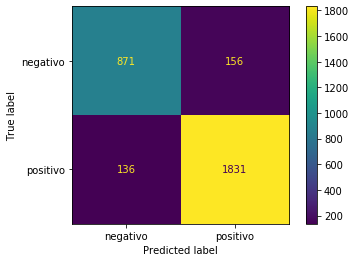

In [36]:
ConfusionMatrixDisplay(confusion_matrix(label, predictTree), display_labels=['negativo', 'positivo']).plot(values_format= '1g')

In [37]:
print("True positive rate:", tpr)
print("False negative rate", fnr)
print("True negative rate",  tnr)
print("False positive rate", fpr)
print("F1 score", f1_score(label, predictTree))

True positive rate: 0.8649453823237339
False negative rate 0.13505461767626614
True negative rate 0.9214896829391042
False positive rate 0.07851031706089583
F1 score 0.9261507334344967


In [38]:
matrix = confusion_matrix(predictForest, label)

tpr = matrix[0][0] / matrix[0].sum()
fnr = matrix[0][1] / matrix[0].sum()
tnr = matrix[1][1] / matrix[1].sum()
fpr = matrix[1][0] / matrix[1].sum()

matrix

array([[1025,    5],
       [   2, 1962]])

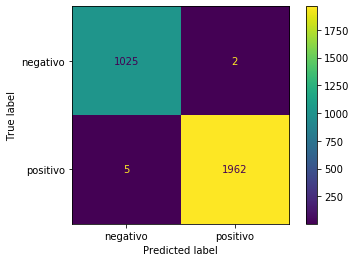

In [39]:
ConfusionMatrixDisplay(confusion_matrix(label, predictForest), display_labels=['negativo', 'positivo']).plot(values_format= '1g')

In [40]:
print("True positive rate:", tpr)
print("False negative rate", fnr)
print("True negative rate",  tnr)
print("False positive rate", fpr)
print("F1 score", f1_score(label, predictForest))

True positive rate: 0.9951456310679612
False negative rate 0.0048543689320388345
True negative rate 0.9989816700610998
False positive rate 0.0010183299389002036
F1 score 0.9982192826252861


In [41]:
matrix = confusion_matrix(predicaoKNN, label)

tpr = matrix[0][0] / matrix[0].sum()
fnr = matrix[0][1] / matrix[0].sum()
tnr = matrix[1][1] / matrix[1].sum()
fpr = matrix[1][0] / matrix[1].sum()

matrix

array([[ 983,   41],
       [  44, 1926]])

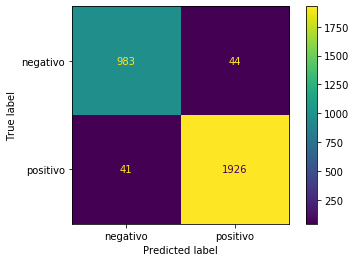

In [42]:
ConfusionMatrixDisplay(confusion_matrix(label, predicaoKNN), display_labels=['negativo', 'positivo']).plot(values_format= '1g')

In [43]:
print("True positive rate:", tpr)
print("False negative rate", fnr)
print("True negative rate",  tnr)
print("False positive rate", fpr)
print("F1 score", f1_score(label, predicaoKNN))

True positive rate: 0.9599609375
False negative rate 0.0400390625
True negative rate 0.9776649746192894
False positive rate 0.02233502538071066
F1 score 0.9784099568199137


In [44]:
featuresTreino, featuresTeste, labelTreino, labelTeste = train_test_split(featuresNormalizadas, label, train_size = 0.7, random_state = 42)

In [45]:
#Decision Tree
tree = DecisionTreeClassifier(min_samples_split = 50)
tree.fit(featuresTreino, labelTreino)
predictTree = tree.predict(featuresTeste)
predictTreeTreino = tree.predict(featuresTreino)

accTree = accuracy_score(labelTeste, predictTree)
accTreeTreino = accuracy_score(labelTreino, predictTreeTreino)

#Random Forest
forest = RandomForestClassifier(n_estimators = 10)
forest.fit(featuresTreino, labelTreino)
predictForest = forest.predict(featuresTeste)
predicaoForestTreino = forest.predict(featuresTreino)

accForest = accuracy_score(labelTeste, predictForest)
accForestTreino = accuracy_score(labelTreino, predicaoForestTreino)

#KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(featuresTreino, labelTreino)
predicaoKNN = knn.predict(featuresTeste)
predicaoKNNTreino = knn.predict(featuresTreino)

accKNN = accuracy_score(labelTeste, predicaoKNN)
accKNNTreino = accuracy_score(labelTreino, predicaoKNNTreino)


print("Tree => Treino/Teste", accTreeTreino, accTree)
print("Forest => Treino/Teste", accForestTreino, accForest)
print("kNN => Treino/Teste", accKNNTreino, accKNN)

Tree => Treino/Teste 0.8701670644391408 0.8509454949944383
Forest => Treino/Teste 0.99618138424821 0.9276974416017798
kNN => Treino/Teste 0.966109785202864 0.9299221357063404


In [46]:
listaAccTreino = []
listaAccTeste = []

for i in range(200,1, -2):
    tree = DecisionTreeClassifier(min_samples_split= i)
    tree.fit(featuresTreino, labelTreino)
    
    predicaoTreeTreino = tree.predict(featuresTreino)
    accTreino = accuracy_score(labelTreino, predicaoTreeTreino)
    
    predicaoTreeTeste = tree.predict(featuresTeste)
    accTeste = accuracy_score(labelTeste, predicaoTreeTeste)
    
    listaAccTreino.append(1-accTreino)
    listaAccTeste.append(1-accTeste)

In [47]:
matrix = confusion_matrix(labelTeste,predicaoTreeTeste)

tpr = matrix[0][0] / matrix[0].sum()
fnr = matrix[0][1] / matrix[0].sum()
tnr = matrix[1][1] / matrix[1].sum()
fpr = matrix[1][0] / matrix[1].sum()

matrix

array([[265,  43],
       [ 27, 564]])

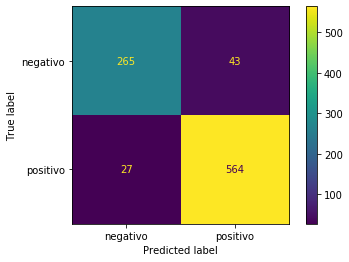

In [48]:
ConfusionMatrixDisplay(confusion_matrix(labelTeste, predicaoTreeTeste), display_labels=['negativo', 'positivo']).plot(values_format= '1g')

In [49]:
print("True positive rate:", tpr)
print("False negative rate", fnr)
print("True negative rate",  tnr)
print("False positive rate", fpr)
print("F1 score", f1_score(labelTeste,predicaoTreeTeste))

True positive rate: 0.8603896103896104
False negative rate 0.1396103896103896
True negative rate 0.9543147208121827
False positive rate 0.04568527918781726
F1 score 0.9415692821368948


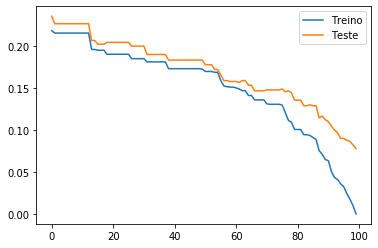

In [50]:
plt.plot(listaAccTreino)
plt.plot(listaAccTeste)
plt.legend(['Treino', 'Teste'])

In [51]:
listaAccTreino = []
listaAccTeste = []

for estimator in range(10,100,1):
       
    forest = RandomForestClassifier(n_estimators = estimator)
    forest.fit(featuresTreino, labelTreino)

    predicaoForestTreino = forest.predict(featuresTreino)
    accTreino = accuracy_score(labelTreino, predicaoForestTreino)
    
    predicaoForestTeste = forest.predict(featuresTeste)
    accTeste = accuracy_score(labelTeste, predicaoForestTeste)
    
    listaAccTreino.append(1-accTreino)
    listaAccTeste.append(1-accTeste)

In [52]:
matrix = confusion_matrix(labelTeste,predicaoForestTeste)

tpr = matrix[0][0] / matrix[0].sum()
fnr = matrix[0][1] / matrix[0].sum()
tnr = matrix[1][1] / matrix[1].sum()
fpr = matrix[1][0] / matrix[1].sum()

matrix

array([[275,  33],
       [ 14, 577]])

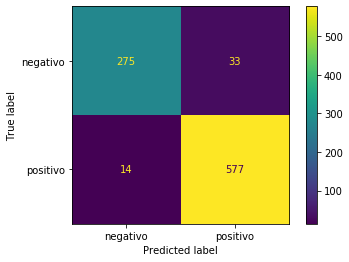

In [53]:
ConfusionMatrixDisplay(confusion_matrix(labelTeste, predicaoForestTeste), display_labels=['negativo', 'positivo']).plot(values_format= '1g')

In [54]:
print("True positive rate:", tpr)
print("False negative rate", fnr)
print("True negative rate",  tnr)
print("False positive rate", fpr)
print("F1 score", f1_score(labelTeste,predicaoForestTeste))

True positive rate: 0.8928571428571429
False negative rate 0.10714285714285714
True negative rate 0.9763113367174281
False positive rate 0.023688663282571912
F1 score 0.9608659450457951


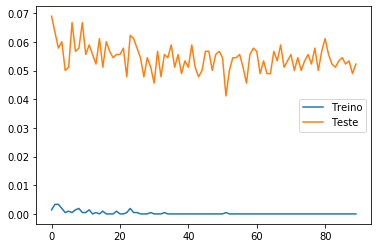

In [55]:
plt.plot(listaAccTreino)
plt.plot(listaAccTeste)
plt.legend(['Treino', 'Teste'])

In [56]:
listaAccTreino = []
listaAccTeste = []

for neighbor in range(5,100,1):
       
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(featuresTreino, labelTreino)
    
    predicaoKnnTreino = knn.predict(featuresTreino)
    accTreino = accuracy_score(labelTreino, predicaoKnnTreino)
    
    predicaoKnnTeste = knn.predict(featuresTeste)
    accTeste = accuracy_score(labelTeste, predicaoKnnTeste)
    
    listaAccTreino.append(1-accTreino)
    listaAccTeste.append(1-accTeste)
    

In [57]:
matrix = confusion_matrix(labelTeste,predicaoKnnTeste)

tpr = matrix[0][0] / matrix[0].sum()
fnr = matrix[0][1] / matrix[0].sum()
tnr = matrix[1][1] / matrix[1].sum()
fpr = matrix[1][0] / matrix[1].sum()

matrix

array([[129, 179],
       [ 60, 531]])

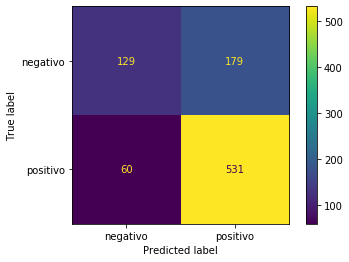

In [58]:
ConfusionMatrixDisplay(confusion_matrix(labelTeste, predicaoKnnTeste), display_labels=['negativo', 'positivo']).plot(values_format= '1g')

In [59]:
print("True positive rate:", tpr)
print("False negative rate", fnr)
print("True negative rate",  tnr)
print("False positive rate", fpr)
print("F1 score", f1_score(labelTeste,predicaoKnnTeste))

True positive rate: 0.41883116883116883
False negative rate 0.5811688311688312
True negative rate 0.8984771573604061
False positive rate 0.10152284263959391
F1 score 0.8162951575710992


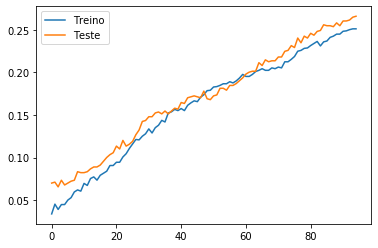

In [60]:
plt.plot(listaAccTreino)
plt.plot(listaAccTeste)
plt.legend(['Treino', 'Teste'])

In [61]:
from sklearn.model_selection import RepeatedStratifiedKFold

folds = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state= 42)\
.split(featuresNormalizadas, label)

somaTpr = 0

for indice_treino, indice_teste in folds:
    
    featuresTreino = featuresNormalizadas[indice_treino]
    labelTreino = label[indice_treino]
    
    featuresTeste = featuresNormalizadas[indice_teste]
    labelTeste = label[indice_teste]
    
    tree = DecisionTreeClassifier()
    tree.fit(featuresTreino, labelTreino)
    
    predicaoTeste  = tree.predict(featuresTeste)
    
    matrix = confusion_matrix(labelTeste, predicaoTeste)

    tpr = matrix[0][0] / matrix[0].sum()
    fnr = matrix[0][1] / matrix[0].sum()
    tnr = matrix[1][1] / matrix[1].sum()
    fpr = matrix[1][0] / matrix[1].sum()
    
    somaTpr = somaTpr + tpr
    
    print("True positive rate:", tpr)
    print("False negative rate", fnr)
    print("True negative rate",  tnr)
    print("False positive rate", fpr)
    print("F1 score", f1_score(labelTeste, predicaoTeste))
    
print(somaTpr / 5.0)

True positive rate: 0.8390243902439024
False negative rate 0.16097560975609757
True negative rate 0.9568527918781726
False positive rate 0.04314720812182741
F1 score 0.9378109452736317
True positive rate: 0.8878048780487805
False negative rate 0.11219512195121951
True negative rate 0.9467005076142132
False positive rate 0.0532994923857868
F1 score 0.9443037974683544
True positive rate: 0.8980582524271845
False negative rate 0.10194174757281553
True negative rate 0.9491094147582697
False positive rate 0.05089058524173028
F1 score 0.9479034307496824
True positive rate: 0.9174757281553398
False negative rate 0.0825242718446602
True negative rate 0.9465648854961832
False positive rate 0.05343511450381679
F1 score 0.9514066496163683
True positive rate: 0.8878048780487805
False negative rate 0.11219512195121951
True negative rate 0.9491094147582697
False positive rate 0.05089058524173028
F1 score 0.9455006337135615
0.8860336253847976


In [62]:
from sklearn.model_selection import RepeatedStratifiedKFold

folds = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state= 42)\
.split(featuresNormalizadas, label)

somaTpr = 0

for indice_treino, indice_teste in folds:
    
    featuresTreino = featuresNormalizadas[indice_treino]
    labelTreino = label[indice_treino]
    
    featuresTeste = featuresNormalizadas[indice_teste]
    labelTeste = label[indice_teste]
    
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(featuresTreino, labelTreino)
    
    predicaoTeste  = knn.predict(featuresTeste)
    
    matrix = confusion_matrix(labelTeste, predicaoTeste)

    tpr = matrix[0][0] / matrix[0].sum()
    fnr = matrix[0][1] / matrix[0].sum()
    tnr = matrix[1][1] / matrix[1].sum()
    fpr = matrix[1][0] / matrix[1].sum()
    
    somaTpr = somaTpr + tpr
    
    print("True positive rate:", tpr)
    print("False negative rate", fnr)
    print("True negative rate",  tnr)
    print("False positive rate", fpr)
    print("F1 score", f1_score(labelTeste, predicaoTeste))
    
print(somaTpr / 5.0)

True positive rate: 0.9121951219512195
False negative rate 0.08780487804878048
True negative rate 0.9644670050761421
False positive rate 0.03553299492385787
F1 score 0.9595959595959597
True positive rate: 0.8926829268292683
False negative rate 0.1073170731707317
True negative rate 0.9670050761421319
False positive rate 0.03299492385786802
F1 score 0.9560853199498118
True positive rate: 0.9029126213592233
False negative rate 0.0970873786407767
True negative rate 0.9516539440203562
False positive rate 0.04834605597964377
F1 score 0.9504447268106734
True positive rate: 0.9174757281553398
False negative rate 0.0825242718446602
True negative rate 0.9516539440203562
False positive rate 0.04834605597964377
F1 score 0.9540816326530612
True positive rate: 0.8975609756097561
False negative rate 0.1024390243902439
True negative rate 0.9567430025445293
False positive rate 0.043256997455470736
F1 score 0.9518987341772152
0.9045654747809614


In [63]:
from sklearn.model_selection import RepeatedStratifiedKFold

folds = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state= 42)\
.split(featuresNormalizadas, label)

somaTpr = 0

for indice_treino, indice_teste in folds:
    
    featuresTreino = featuresNormalizadas[indice_treino]
    labelTreino = label[indice_treino]
    
    featuresTeste = featuresNormalizadas[indice_teste]
    labelTeste = label[indice_teste]
     
    forest = RandomForestClassifier(n_estimators = 100)
    forest.fit(featuresTreino, labelTreino)
    
    predicaoTeste  = forest.predict(featuresTeste)
    
    matrix = confusion_matrix(labelTeste, predicaoTeste)

    tpr = matrix[0][0] / matrix[0].sum()
    fnr = matrix[0][1] / matrix[0].sum()
    tnr = matrix[1][1] / matrix[1].sum()
    fpr = matrix[1][0] / matrix[1].sum()
    
    somaTpr = somaTpr + tpr
    
    print("True positive rate:", tpr)
    print("False negative rate", fnr)
    print("True negative rate",  tnr)
    print("False positive rate", fpr)
    print("F1 score", f1_score(labelTeste, predicaoTeste))
    
print(somaTpr / 5.0)

True positive rate: 0.8780487804878049
False negative rate 0.12195121951219512
True negative rate 0.9619289340101523
False positive rate 0.03807106598984772
F1 score 0.9498746867167919
True positive rate: 0.9073170731707317
False negative rate 0.09268292682926829
True negative rate 0.9796954314720813
False positive rate 0.02030456852791878
F1 score 0.9662077596996246
True positive rate: 0.8980582524271845
False negative rate 0.10194174757281553
True negative rate 0.9720101781170484
False positive rate 0.027989821882951654
F1 score 0.9597989949748743
True positive rate: 0.9466019417475728
False negative rate 0.05339805825242718
True negative rate 0.9643765903307888
False positive rate 0.035623409669211195
F1 score 0.9680715197956578
True positive rate: 0.9121951219512195
False negative rate 0.08780487804878048
True negative rate 0.9567430025445293
False positive rate 0.043256997455470736
F1 score 0.9555273189326556
0.9084442339569027


#### Pratica 2 -  Dataset Titanic (datasets/titanic.csv)

#### Descricao

Problema

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

Atributos

- survival (0 = No, 1 = Yes)
- pclas: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- sex: Sex	
- sibsp: # of siblings / spouses aboard the Titanic	
- parch: # of parents / children aboard the Titanic	
- ticket: Ticket number	
- fare: Passenger fare	
- cabin: Cabin number	
- embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Etapas, fazendo a devida otimização de parametros:
1. Utilizando a abordagem de holdout (70% para treinamento, 30% para teste), fazendo uso do ponto de operação com a generalização, determine:
    - O melhor classificador para determinar quem sobreviveu, exiba a sua matriz de confusão com o resultado
    - O melhor classificador para determinar quem não sobreviveu, exiba a sua matriz de confusão com o resultado
    - O melhor classificador para determinar quem sobreviveu ou não
2. Repita os passos 3 e 4 utilizando a abordagem de validação cruzada (5 folds)
    - O melhor classificador para determinar quem sobreviveu, exiba a sua matriz de confusão com o resultado
    - O melhor classificador para determinar quem não sobreviveu, exiba a sua matriz de confusão com o resultado
    - O melhor classificador para determinar quem sobreviveu ou não

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
dfTitanic = pd.read_csv('datasets/titanic.csv')

In [66]:
dfTitanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [67]:
dfTitanic = dfTitanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [68]:
dfTitanic.dtypes

Survived      int64
Pclass        int64
Sex          object
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [69]:
dfNumerico = pd.get_dummies(dfTitanic, prefix_sep='_', drop_first=True)

In [70]:
dfNumerico.describe()

,Survived,Pclass,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,32.204208,0.647587,0.086420,0.722783
std,0.486592,0.836071,1.102743,0.806057,49.693429,0.477990,0.281141,0.447876
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [71]:
from sklearn.preprocessing import MaxAbsScaler

features = np.array(dfNumerico.drop(['Survived'], axis = 1))
label = np.array(dfNumerico.Survived)

scaler = MaxAbsScaler()
scaler.fit(features)
featuresNormalizadas = scaler.transform(features)

In [72]:
featuresTreino, featuresTeste, labelTreino, labelTeste = train_test_split(featuresNormalizadas, label, train_size = 0.7, random_state = 42)

In [73]:
listaErroTreino = []
listaErroTeste = []

for i in range(200,1,-2):
    tree = DecisionTreeClassifier(min_samples_split= i)
    tree.fit(featuresTreino, labelTreino)
    
    predicaoTreino = tree.predict(featuresTreino)
    accTreino = accuracy_score(labelTreino, predicaoTreino)
    
    predicaoTeste = tree.predict(featuresTeste)
    accTeste = accuracy_score(labelTeste, predicaoTeste)
    
    #100% - acc% = erro
    listaErroTeste.append(1 - accTeste)
    listaErroTreino.append(1- accTreino)
    

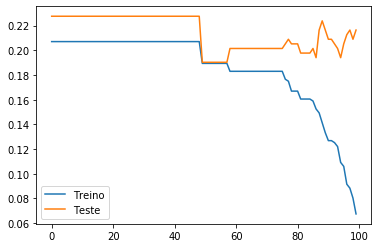

In [74]:
plt.plot(listaErroTreino)
plt.plot(listaErroTeste)
plt.legend(['Treino', 'Teste'])
plt.show()

In [75]:
from sklearn.ensemble import RandomForestClassifier
listaErroTreino = []
listaErroTeste = []

for i in range(1,200,2):
    forest = RandomForestClassifier(n_estimators = i)
    forest.fit(featuresTreino, labelTreino)
    
    predicaoTreino = forest.predict(featuresTreino)
    accTreino = accuracy_score(labelTreino, predicaoTreino)
    
    predicaoTeste = forest.predict(featuresTeste)
    accTeste = accuracy_score(labelTeste, predicaoTeste)
    
    #100% - acc% = erro
    listaErroTeste.append(1 - accTeste)
    listaErroTreino.append(1- accTreino)
    

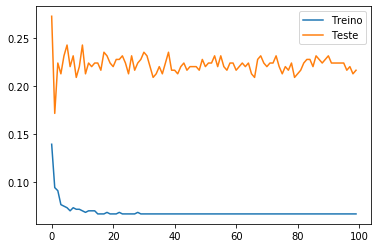

In [76]:
plt.plot(listaErroTreino)
plt.plot(listaErroTeste)
plt.legend(['Treino', 'Teste'])
plt.show()

In [77]:
listaAccTreino = []
listaAccTeste = []

for neighbor in range(5,100,1):
       
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(featuresTreino, labelTreino)
    
    predicaoKnnTreino = knn.predict(featuresTreino)
    accTreino = accuracy_score(labelTreino, predicaoKnnTreino)
    
    predicaoKnnTeste = knn.predict(featuresTeste)
    accTeste = accuracy_score(labelTeste, predicaoKnnTeste)
    
    listaAccTreino.append(1-accTreino)
    listaAccTeste.append(1-accTeste)
    

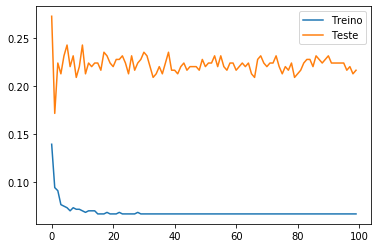

In [78]:
plt.plot(listaErroTreino)
plt.plot(listaErroTeste)
plt.legend(['Treino', 'Teste'])
plt.show()

####  Pratica 3 -  Detecção de Números (datasets/digit.csv)

#### Descricao

Problema

Detecção de imagens com números (0 a 9) escritos a mão.

Atributos

- Label (0,1,2,3,4,5,6,7,8,9)
- pixel0
- pixel1
- ...
- pixel783

Etapas, fazendo a devida otimização de parametros:
1. Utilizando a abordagem de holdout (70% para treinamento, 30% para teste), fazendo uso do ponto de operação com a generalização, determine:
    - O melhor classificador para detecção dos números
    - O melhor classificador para detecção do dígito '5'

In [79]:
df = pd.read_csv('datasets/digit.csv')

In [80]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [81]:
df.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [82]:
set(df.label)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [83]:
features = np.array(df.drop(['label'], axis =1))
label = np.array(df['label'])

In [84]:
scaler = MaxAbsScaler()
scaler.fit(features)
featuresNormalizadas = scaler.transform(features)

In [85]:
featuresTreino, featuresTeste, labelTreino, labelTeste = train_test_split(featuresNormalizadas, label, train_size = 0.7, random_state = 42)

In [86]:
listaErroTreino = []
listaErroTeste = []

for i in range(200, 1, -20):
    tree = DecisionTreeClassifier(min_samples_split = i)
    tree.fit(featuresTreino, labelTreino)
    
    predicaoTreino = tree.predict(featuresTreino)
    predicaoTeste = tree.predict(featuresTeste)
    
    erroTreino =(1 - accuracy_score(predicaoTreino, labelTreino))
    erroTeste = (1- accuracy_score(predicaoTeste, labelTeste))
    
    listaErroTeste.append(erroTeste)
    listaErroTreino.append(erroTreino)

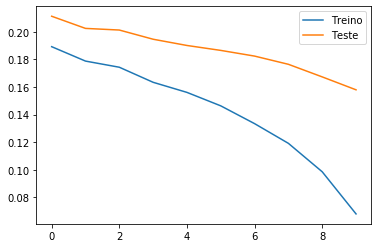

In [87]:
plt.plot(listaErroTreino)
plt.plot(listaErroTeste)
plt.legend(['Treino', 'Teste'])
plt.show()

In [88]:
tree = DecisionTreeClassifier(min_samples_split = 20)
tree.fit(featuresTreino, labelTreino)

DecisionTreeClassifier(min_samples_split=20)

In [89]:
predictTeste = tree.predict(featuresTeste)
matrix = confusion_matrix(labelTeste, predictTeste)

In [90]:
matrix
#linha = classe
#coluna = como a classe foi classificada

array([[1082,    6,   24,    9,   12,   37,   12,    5,    9,    4],
       [   3, 1299,   18,    9,    9,    6,    4,    5,   27,    9],
       [  28,   25, 1063,   28,   24,   21,   18,   38,   41,    8],
       [  22,   19,   52, 1054,   21,   88,    1,   18,   55,   25],
       [   9,   17,   21,   10, 1052,   14,   17,    8,   26,   49],
       [  15,   17,   22,   66,   22,  842,   36,   11,   35,   19],
       [  24,    6,   25,   15,   31,   34, 1090,    3,   23,    5],
       [  14,    9,   37,   21,   24,   13,    0, 1201,    8,   32],
       [  24,   26,   45,   51,   36,   37,   21,   11,  930,   28],
       [  12,    3,   11,   27,   64,   34,   11,   34,   43,  992]])

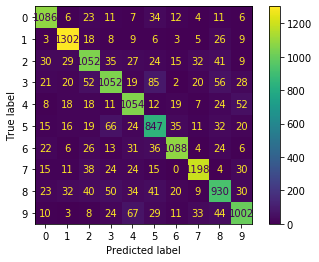

In [91]:
ConfusionMatrixDisplay(confusion_matrix(labelTeste, predicaoTeste), display_labels=range(0,10)).plot()

In [92]:
confiancas = tree.predict_proba(featuresTeste)
confiancas
# tree.predict_proba(featuresTeste)[0] confianças da primeira linha (instância 0)

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.25],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [93]:
#Confianças do dígito 5
confiancas[:,5]

array([0., 0., 0., ..., 1., 0., 0.])

In [94]:
fprTree, tprTree, limiaresTree = roc_curve(labelTeste, confiancas[:,5], pos_label = 5)

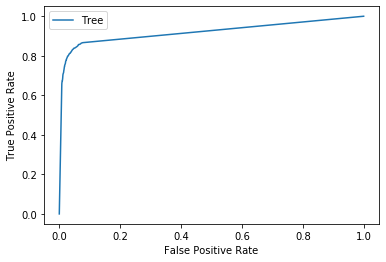

In [95]:
plt.plot(fprTree, tprTree)
plt.legend(['Tree'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [96]:
auc(fprTree, tprTree)

0.9198133472483886